In [167]:
# generate data
import Distributions
using Revise
using ForneyLab
using Random
import ProgressMeter
using Plots

Random.seed!(42)

n_samples = 100

dimensionality = 2
rθ = [-0.9, 0.5]
ms = [[0.9, 0.1], [0.2, 0.8]]
σ(w, x) = 1/(1+exp(-w'x))

A_data = [0.9 0.1; 0.1 0.9] # Transition probabilities (some transitions are impossible)

s_0_data = [1.0, 0.0] # Initial state

# Generate some data
s_data = Vector{Vector{Float64}}(undef, n_samples) # one-hot encoding of the states
s_t_min_data = s_0_data
for t in 1:n_samples
    a = A_data*s_t_min_data
    s_data[t] = sample(ProbabilityDistribution(Categorical, p=a./sum(a))) # Simulate state transition
    
    s_t_min_data = s_data[t]
end
πs = [σ(rθ, ms[findmax(s_data[1])[2]]) for i in 1:n_samples]
outputs = [rand(Distributions.Bernoulli(πs[i])) for i in 1:n_samples];
;

In [168]:
# test nonlinear

using LinearAlgebra
import ForneyLab: unsafeMean, unsafeCov

graph = FactorGraph()

T = n_samples
x = Vector{Variable}(undef, T)
z = Vector{Variable}(undef, T)
s = Vector{Variable}(undef, T) # one-hot coding
y = Vector{Variable}(undef, T)

@RV A ~ Dirichlet(ones(dimensionality, dimensionality))
@RV s_0 ~ Categorical(1/dimensionality*ones(dimensionality))

@RV m_1 ~ GaussianMeanPrecision([0.9, 0.1], Matrix(Diagonal(ones(dimensionality))))
@RV w_1 ~ Wishart(Matrix(Diagonal(ones(dimensionality))), dimensionality)
@RV m_2 ~ GaussianMeanPrecision([0.2, 0.8], Matrix(Diagonal(ones(dimensionality))))
@RV w_2 ~ Wishart(Matrix(Diagonal(ones(dimensionality))), dimensionality)

@RV θ  ~ GaussianMeanPrecision(placeholder(:m_θ, dims=(dimensionality,)), placeholder(:W_θ, dims=(dimensionality, dimensionality)))
f(w, x) = 1/(1+exp(-w'x))
s_t_min = s_0
for i in 1:T
    @RV s[i] ~ Transition(s_t_min, A)
    @RV z[i] ~ GaussianMixture(s[i], m_1, w_1, m_2, w_2)
    @RV x[i] ~ Nonlinear{Sampling}(θ, z[i], g=f, in_variates=[Multivariate, Multivariate], out_variate=Univariate)
    @RV y[i] ~ Bernoulli(x[i])
    
    s_t_min = s[i]
    placeholder(y[i], :y, index=i)
end

In [169]:
draw();

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.47.2 (20210527.0053)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 11877503422955289335 -->
 
 11877503422955289335 
 
 Ber 
 bernoulli_72 
 
<!-- 15922454586353390120 -->
 
 15922454586353390120 
 
 g{Sampling} 
 nonlinear_72 
 
<!-- 11877503422955289335--15922454586353390120 -->
 
 11877503422955289335--15922454586353390120 
 
 x_72 
 1 out 
 2 p 
 
<!-- 2955115938360762959 -->
 
 2955115938360762959 
 
 = 
 equ_w_2_70 
 
<!-- 13855412485900871691 -->
 
 13855412485900871691 
 
 = 
 equ_w_2_69 
 
<!-- 2955115938360762959--13855412485900871691 -->
 
 2955115938360762959--13855412485900871691 
 
 w_2 
 3 3 
 2 2 
 
<!-- 10465452743140762974 -->
 
 10465452743140762974 
 
 GM 
 gaussianmixture_70 
 
<!-- 2955115938360762959--10465452743140762974 -->
 
 2955115938360762959--10465452743140762974 
 
 w_2 
 6 w2 
 1 1 
 
<!-- 12569937316306777085 -->
 
 12569937316306777085 
 
 = 
 equ_s_40_1 
 
<!-- 14872478224739012144 -->
 
 14872478224739012144 
 
 T 
 transition_41 
 
<!-- 12569937316306777085--14872478224739012144 -->
 
 12569937316306777085--14872478224739012144 
 
 s_40 
 2 in1 
 3 3 
 
<!-- 17951007021830398486 -->
 
 17951007021830398486 
 
 GM 
 gaussianmixture_40 
 
<!-- 12569937316306777085--17951007021830398486 -->
 
 12569937316306777085--17951007021830398486 
 
 s_40 
 2 z 
 2 2 
 
<!-- 7367837500078838265 -->
 
 7367837500078838265 
 
 T 
 transition_40 
 
<!-- 12569937316306777085--7367837500078838265 -->
 
 12569937316306777085--7367837500078838265 
 
 s_40 
 1 out 
 1 1 
 
<!-- 4929974698368611555 -->
 
 4929974698368611555 
 
 g{Sampling} 
 nonlinear_13 
 
<!-- 6245790734581972244 -->
 
 6245790734581972244 
 
 GM 
 gaussianmixture_13 
 
<!-- 4929974698368611555--6245790734581972244 -->
 
 4929974698368611555--6245790734581972244 
 
 z_13 
 1 out 
 3 in2 
 
<!-- 13581660169514179859 -->
 
 13581660169514179859 
 
 = 
 equ_s_4_1 
 
<!-- 9086570515236341273 -->
 
 9086570515236341273 
 
 T 
 transition_5 
 
<!-- 13581660169514179859--9086570515236341273 -->
 
 13581660169514179859--9086570515236341273 
 
 s_4 
 2 in1 
 3 3 
 
<!-- 8653772138847694368 -->
 
 8653772138847694368 
 
 GM 
 gaussianmixture_4 
 
<!-- 13581660169514179859--8653772138847694368 -->
 
 13581660169514179859--8653772138847694368 
 
 s_4 
 2 z 
 2 2 
 
<!-- 9989249770851498529 -->
 
 9989249770851498529 
 
 T 
 transition_4 
 
<!-- 13581660169514179859--9989249770851498529 -->
 
 13581660169514179859--9989249770851498529 
 
 s_4 
 1 out 
 1 1 
 
<!-- 3165465582385890593 -->
 
 3165465582385890593 
 
 placeholder_y_38 
 
<!-- 5331903980843066594 -->
 
 5331903980843066594 
 
 Ber 
 bernoulli_38 
 
<!-- 3165465582385890593--5331903980843066594 -->
 
 3165465582385890593--5331903980843066594 
 
 y_38 
 1 out 
 1 out 
 
<!-- 4509902110341404289 -->
 
 4509902110341404289 
 
 = 
 equ_θ_86 
 
<!-- 5785402031503924488 -->
 
 5785402031503924488 
 
 g{Sampling} 
 nonlinear_86 
 
<!-- 4509902110341404289--5785402031503924488 -->
 
 4509902110341404289--5785402031503924488 
 
 θ 
 2 in1 
 1 1 
 
<!-- 8126395509482903808 -->
 
 8126395509482903808 
 
 = 
 equ_θ_85 
 
<!-- 4509902110341404289--8126395509482903808 -->
 
 4509902110341404289--8126395509482903808 
 
 θ 
 3 3 
 2 2 
 
<!-- 7249106855009793896 -->
 
 7249106855009793896 
 
 = 
 equ_m_2_38 
 
<!-- 14980049498945775502 -->
 
 14980049498945775502 
 
 = 
 equ_m_2_37 
 
<!-- 7249106855009793896--14980049498945775502 -->
 
 7249106855009793896--14980049498945775502 
 
 m_2 
 3 3 
 2 2 
 
<!-- 6612624617350646630 -->
 
 6612624617350646630 
 
 GM 
 gaussianmixture_38 
 
<!-- 7249106855009793896--6612624617350646630 -->
 
 7249106855009793896--6612624617350646630 
 
 m_2 
 5 m2 
 1 1 
 
<!-- 18247542458260901791 -->
 
 18247542458260901791 
 
 = 
 equ_A_64 
 
<!-- 5303996073604197846 -->
 
 5303996073604197846

In [170]:
# Define posterior factorization
pfz = PosteriorFactorization(A, [s_0; s], m_1, w_1, m_2, w_2, z, ids=[:A, :S, :M1, :W1, :M2, :W2, :Z]);

In [171]:
# Compile algorithm
algo = messagePassingAlgorithm(free_energy=true)

# Generate source code
src_code = algorithmSourceCode(algo, free_energy=true);

In [176]:
println(src_code)

begin

function initZ()

messages = Array{Message}(undef, 798)

messages[1] = Message(vague(GaussianWeightedMeanPrecision))
messages[2] = Message(vague(GaussianWeightedMeanPrecision))
messages[3] = Message(vague(GaussianWeightedMeanPrecision))
messages[4] = Message(vague(GaussianWeightedMeanPrecision))
messages[5] = Message(vague(GaussianWeightedMeanPrecision))
messages[6] = Message(vague(GaussianWeightedMeanPrecision))
messages[7] = Message(vague(GaussianWeightedMeanPrecision))
messages[8] = Message(vague(GaussianWeightedMeanPrecision))
messages[9] = Message(vague(GaussianWeightedMeanPrecision))
messages[10] = Message(vague(GaussianWeightedMeanPrecision))
messages[11] = Message(vague(GaussianWeightedMeanPrecision))
messages[12] = Message(vague(GaussianWeightedMeanPrecision))
messages[13] = Message(vague(GaussianWeightedMeanPrecision))
messages[14] = Message(vague(GaussianWeightedMeanPrecision))
messages[15] = Message(vague(GaussianWeightedMeanPrecision))
messages[16] = Message(vague(G

In [177]:
# Load algorithm
eval(Meta.parse(src_code))

freeEnergy (generic function with 1 method)

In [178]:
n_messages = length(initZ());

function initZ(n_messages)
    messages = Array{Message}(undef, n_messages)
    for i in 1:length(messages)
        messages[i] = Message(vague(GaussianMeanPrecision, 2))
    end
    messages
end

initZ (generic function with 2 methods)

In [182]:
messages = initZ(n_messages);

In [183]:
# Initial posterior factors
marginals = Dict{Symbol, ProbabilityDistribution}(:A => vague(Dirichlet, (2,2)), 
                                                  :m_1 => ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=[0.9, 0.1], w=Matrix(Diagonal(ones(2)))),
                                                  :w_1 => ProbabilityDistribution(MatrixVariate, Wishart, v=Matrix(Diagonal([1e0, 1e0])), nu=2.00),
                                                  :m_2 => ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=[0.2, 0.8], w=Matrix(Diagonal(ones(2)))),
                                                  :w_2 => ProbabilityDistribution(MatrixVariate, Wishart, v=Matrix(Diagonal([1e0, 1e0])), nu=2.00))

for i in 0:n_samples
    marginals[:s_*i] = vague(Categorical, 2)
end

# Initialize data
data = Dict(:y => outputs, :m_θ => [-0.9, 0.5], :W_θ => Matrix(Diagonal([1e2, 1e2])))
n_its = 40

# Run algorithm
F = Vector{Float64}(undef, n_its)
ProgressMeter.@showprogress for i in 1:n_its
    stepZ!(data, marginals, messages)
    stepS!(data, marginals)
    stepA!(data, marginals)
    stepM1!(data, marginals)
    stepW1!(data, marginals)
    stepM2!(data, marginals)
    stepW2!(data, marginals) 
    F[i] = freeEnergy(data, marginals)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


In [184]:
unsafeMean(marginals[:θ])

2-element Vector{Float64}:
 -0.9569609784877313
  0.5283920953283517

In [185]:
veθ = unsafeCov(marginals[:θ])

2×2 Matrix{Float64}:
  0.00872445  -9.37272e-7
 -9.37272e-7   0.0111824

In [188]:
es = [unsafeMean(marginals[:s_*i]) for i in 1:n_samples];

In [73]:
inputs[1, :]

2-element Vector{Float64}:
 -0.5560268761463861
  0.24720770605505335

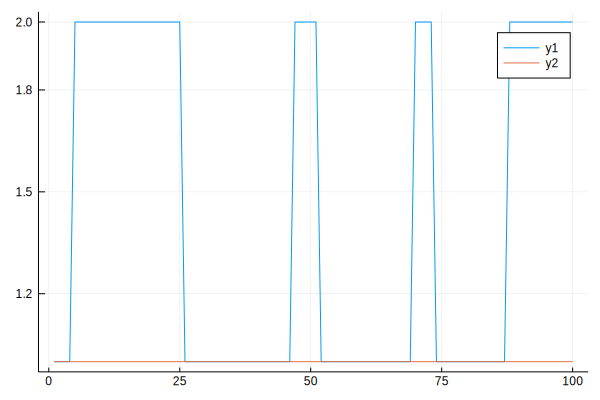

In [189]:
plot(map(x -> x[2], findmax.(s_data)))
plot!(map(x -> x[2], findmax.(es)))